In [48]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [49]:
# cramer v test
def cramers_V(var1, var2):
    crosstab = np.array(
        pd.crosstab(var1, var2, rownames=None, colnames=None)
    )  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = (
        min(crosstab.shape) - 1
    )  # Take the minimum value between the columns and the rows of the cross table
    return stat / (obs * mini)

# view max and min of a column and other stats
def desc(ds, colname):
    print(ds[colname].values[0:10])
    print(ds[colname].describe())


In [50]:
# load dataset
df = pd.read_csv('mtl_clean.csv')
#df = df[(df['INCIDENT_TYPE_DESC'] < 11)]
len(df)

908486

In [51]:
# compute chi square correlation, suitable for categorical values
# source: https://www.youtube.com/watch?v=_jdfjRzaHMM
tips_categorical = df[
    [
        'CREATION_DATE_TIME', 'INCIDENT_TYPE_DESC', 
          'DESCRIPTION_GROUPE', 'NOM_ARROND', 'NOM_VILLE'
    ]
]

rows = []

for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(
            tips_categorical[var1], tips_categorical[var2]
        )  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(
    cramers_results, columns=tips_categorical.columns, index=tips_categorical.columns
)


In [52]:
df2

,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,NOM_ARROND,NOM_VILLE
CREATION_DATE_TIME,1.0,0.00,0.00,0.00,0.00
INCIDENT_TYPE_DESC,0.0,1.00,1.00,0.01,0.01
DESCRIPTION_GROUPE,0.0,1.00,1.00,0.02,0.01
NOM_ARROND,0.0,0.01,0.02,1.00,0.27
NOM_VILLE,0.0,0.01,0.01,0.27,1.00


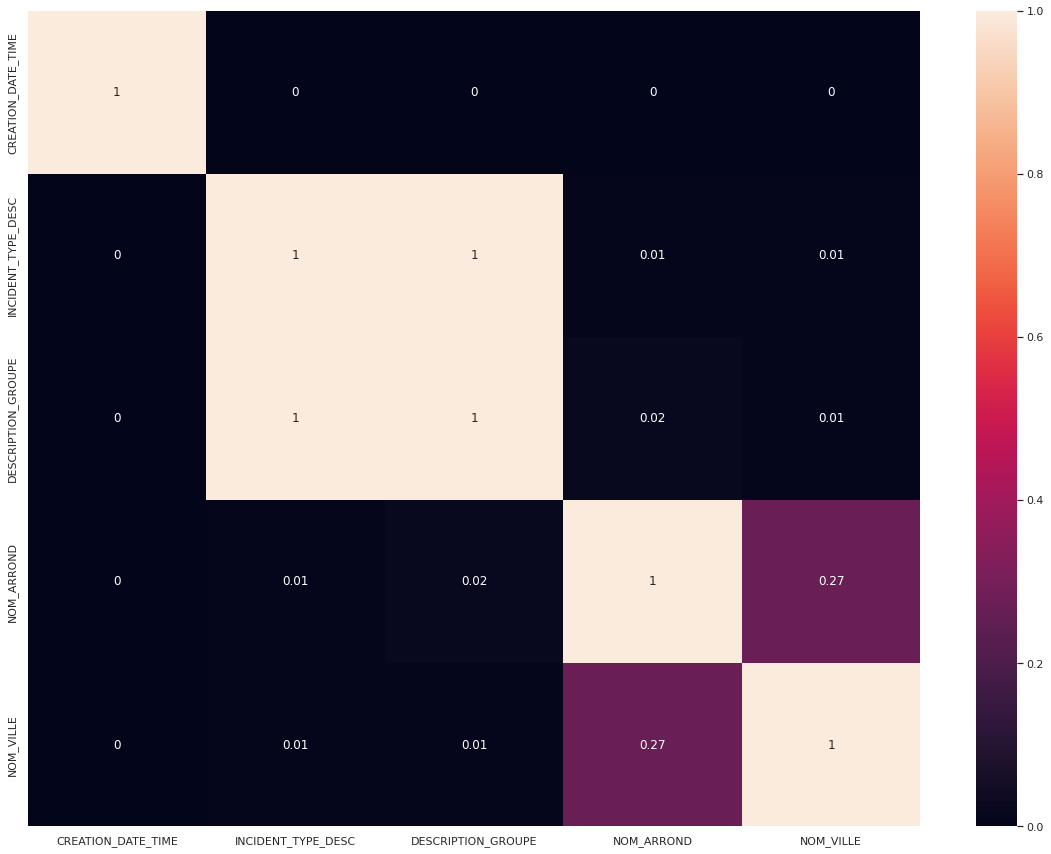

In [53]:
# plotting the heatmap
sns.set(rc={'figure.figsize':(20,15)})
hm = sns.heatmap(data=df2, annot=True)

# displaying the plotted heatmap
plt.show()

In [54]:
desc(df, 'INCIDENT_TYPE_DESC')

[0 1 1 0 0 0 2 3 0 0]
count    908486.000000
mean         15.395073
std          21.131956
min           0.000000
25%           7.000000
50%          12.000000
75%          12.000000
max         138.000000
Name: INCIDENT_TYPE_DESC, dtype: float64


In [55]:
df['INCIDENT_TYPE_DESC'].value_counts()

12     437891
2       76157
1       60879
93      41734
7       29283
        ...  
103         1
122         1
118         1
81          1
138         1
Name: INCIDENT_TYPE_DESC, Length: 139, dtype: int64